<a href="https://colab.research.google.com/github/hemanth12527/1002207795-daa-handson-6/blob/main/hands_on_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

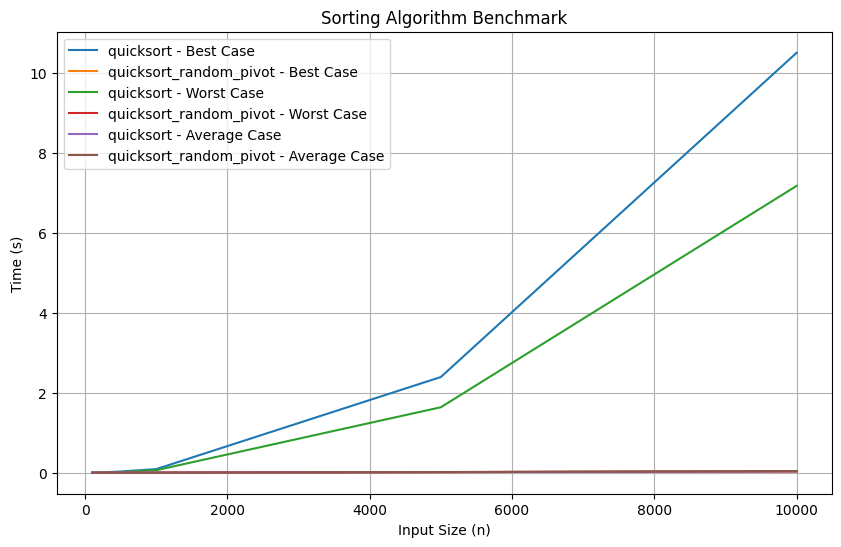

In [10]:
import random
import timeit
import matplotlib.pyplot as plt

def partition(arr, low, high):
    pivot = arr[high]
    i = low - 1
    for j in range(low, high):
        if arr[j] <= pivot:
            i += 1
            arr[i], arr[j] = arr[j], arr[i]
    arr[i+1], arr[high] = arr[high], arr[i+1]
    return i+1

def quicksort(arr):
    stack = [(0, len(arr) - 1)]
    while stack:
        low, high = stack.pop()
        if low < high:
            pi = partition(arr, low, high)
            if pi - low < high - pi:
                stack.append((low, pi - 1))
                stack.append((pi + 1, high))
            else:
                stack.append((pi + 1, high))
                stack.append((low, pi - 1))

def quicksort_random_pivot(arr):
    random.shuffle(arr)
    quicksort(arr)

def generate_input(n, case):
    if case == "best":
        return [i for i in range(n)]
    elif case == "worst":
        return [i for i in range(n, 0, -1)]
    elif case == "average":
        return [random.randint(0, 1000) for _ in range(n)]

def benchmark_sorting_function(sort_func, input_generator, sizes, case, repetitions=3):
    times = []
    for size in sizes:
        total_time = 0
        for _ in range(repetitions):
            arr = input_generator(size, case)
            start_time = timeit.default_timer()
            sort_func(arr)
            end_time = timeit.default_timer()
            total_time += end_time - start_time
        avg_time = total_time / repetitions
        times.append(avg_time)
    return times

if __name__ == "__main__":
    sizes = [100, 500, 1000, 5000, 10000]
    cases = ["best", "worst", "average"]

    sorting_functions = {
        "quicksort": quicksort,
        "quicksort_random_pivot": quicksort_random_pivot
    }

    plt.figure(figsize=(10, 6))

    for case in cases:
        for sort_func_name, sort_func in sorting_functions.items():
            case_times = benchmark_sorting_function(sort_func, generate_input, sizes, case)
            plt.plot(sizes, case_times, label=f'{sort_func_name} - {case.capitalize()} Case')

    plt.xlabel('Input Size (n)')
    plt.ylabel('Time (s)')
    plt.title('Sorting Algorithm Benchmark')
    plt.legend()
    plt.grid(True)
    plt.show()